In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Didn't import the SKL yet

In [2]:
wine = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\Kag\WineQT.csv', index_col='Id')

In [3]:
wine.reset_index(inplace=True)
wine.drop(columns='Id', inplace=True)

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# Exploring Data

### Verify our data is cleaned and doesn't have nulls

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Explore the diffrence between values for each col

In [7]:
#a great way to see the radical values for each col.
COMPAR_NUM = 30

coloredData = sns.light_palette("brown", as_cmap=True)
wine.head(COMPAR_NUM).style.background_gradient(cmap=coloredData)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5


In [8]:
#an automatic way to get a color map for each quality.
#unfor that method doesn't work in jupyter.

def perQua(x):
    wine[wine.quality == x].head().style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

minQuality = wine.quality.min()
maxQuality = wine.quality.max()

for x in np.arange(minQuality, maxQuality+1):
    perQua(x)

### Correlation heat-table

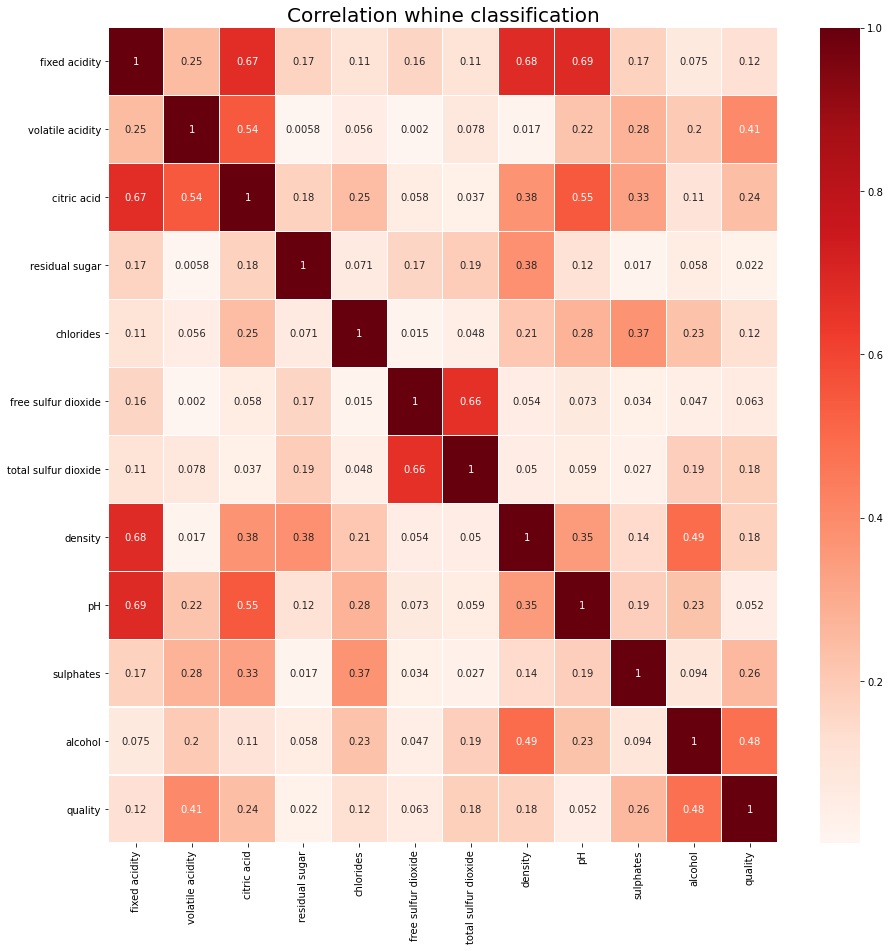

In [9]:
def get_headmap(wine: dict):
    corr = wine.corr().abs()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation whine classification", size=20)
get_headmap(wine)

### Counting amount per quality

In [10]:
#method to calculate how much wines are in any quality

winePerQua = {}
for value in wine.quality:
    if value not in winePerQua:
        winePerQua[value] = 0
    winePerQua[value] += 1
winePerQua

{5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6}

In [11]:
#spliting winePerQua to 2 lists - one for values, one for qualities.
values = [vl for vl in winePerQua.values()]
names = [nm for nm in winePerQua]

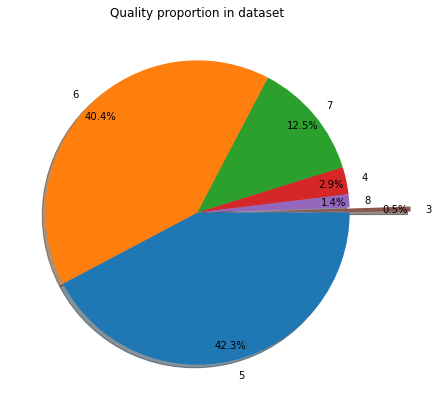

In [12]:
plt.figure(figsize=(7, 7))
plt.pie([values][0], radius = 1, shadow=True,
        labels=[names][0], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0,0,0,0.4])
#plt.pie([wine.shape[0]], labeldistance=-0, radius=0.5, colors=['powderblue'])
plt.title("Quality proportion in dataset")
plt.show()

# Modeling

### Spliting to train and test

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [14]:
Y = wine['quality']
X = wine[wine.columns[0: len(wine.columns)-1]]

In [15]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [16]:
Y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
print(f'Training {x_train.shape}')
print(f'Test {x_test.shape}')

Training (914, 11)
Test (229, 11)


### Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Train dataset after scaler:')
pd.DataFrame(x_train).head(10).style.background_gradient(cmap=sns.light_palette("brown", as_cmap=True))

Train dataset after scaler:


,0,1,2,3,4,5,6,7,8,9,10
0,0.381818,0.383562,0.110000,0.130137,0.135225,0.149254,0.134276,0.670982,0.448819,0.099379,0.169231
1,0.163636,0.356164,0.230000,0.082192,0.113523,0.149254,0.399293,0.404417,0.488189,0.192547,0.384615
2,0.163636,0.109589,0.280000,0.102740,0.000000,0.522388,0.332155,0.043412,0.409449,0.000000,0.507692
3,0.463636,0.315068,0.220000,0.068493,0.113523,0.119403,0.091873,0.558264,0.307087,0.099379,0.169231
4,0.490909,0.136986,0.450000,0.376712,0.101836,0.059701,0.024735,0.573496,0.385827,0.267081,0.646154
5,0.409091,0.260274,0.340000,0.184932,0.116861,0.059701,0.028269,0.657273,0.433071,0.080745,0.353846
6,0.690909,0.178082,0.600000,0.116438,0.115192,0.447761,0.233216,0.725819,0.283465,0.211180,0.323077
7,0.318182,0.130137,0.290000,0.150685,0.303840,0.194030,0.070671,0.402894,0.377953,0.242236,0.553846
8,0.390909,0.212329,0.490000,0.102740,0.123539,0.328358,0.388693,0.573496,0.385827,0.155280,0.169231
9,0.354545,0.082192,0.350000,0.054795,0.071786,0.179104,0.074205,0.294745,0.314961,0.124224,0.446154


### Dummy model

In [20]:
optQua = len(wine.quality.unique())
dummyModelScore = 1 / optQua
print(f'Score: {dummyModelScore}')

Score: 0.16666666666666666


### Xgb model

In [21]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
#this takes like 60 secs
parameters = {'n_estimors': np.arange(50, 300, 50), 'max_depth':np.arange(4, 14, 2)}

model_xgb = XGBClassifier(learning_rate=0.3, n_estimators=300, max_depth=14, verbosity = 0)
clf = GridSearchCV(model_xgb, parameters)
print("loading ...")
clf.fit(x_train, y_train)
print("Done!")

loading ...
Done!


In [23]:
clf.cv_results_

{'mean_fit_time': array([0.89577971, 0.85655231, 0.87929997, 0.87330418, 0.87792606,
        0.96032405, 0.91899209, 0.91209545, 0.92160354, 0.9237958 ,
        0.94450302, 0.929422  , 0.97627406, 1.06207767, 1.0753623 ,
        1.01039033, 0.94480729, 0.90578489, 0.96302819, 0.97187471,
        0.93149214, 0.96294627, 0.9412497 , 0.91265593, 0.92368188]),
 'std_fit_time': array([0.05525509, 0.01272188, 0.02231953, 0.02965756, 0.04253408,
        0.01326711, 0.02689973, 0.01788238, 0.0379564 , 0.04157135,
        0.02589796, 0.0528707 , 0.04925623, 0.08663324, 0.08656512,
        0.08782951, 0.00759724, 0.01910928, 0.03579671, 0.01543824,
        0.01135658, 0.07435319, 0.03273245, 0.02427823, 0.02879519]),
 'mean_score_time': array([0.00586991, 0.00725379, 0.00670943, 0.00652852, 0.00706711,
        0.00701137, 0.00598631, 0.00604157, 0.00673094, 0.00733867,
        0.00627337, 0.00761571, 0.00738511, 0.00731039, 0.0077457 ,
        0.00737052, 0.006391  , 0.0077455 , 0.00709138, 0.00

In [38]:
print(f'Best Score: {clf.best_score_}')
print(f'Best Hyperparameters: {clf.best_params_}')

Best Score: 0.6389839668528193
Best Hyperparameters: {'max_depth': 6, 'n_estimors': 50}


In [25]:
print(f'This model is better than the dummy model by {pow(clf.best_score_, 2) / pow(dummyModelScore, 2)} times')

This model is better than the dummy model by 14.698818356218737 times


# Testing

In [46]:
Model_xgb = clf.best_estimator_
print(Model_xgb.score(x_test ,y_test))

0.5720524017467249
